<a href="https://colab.research.google.com/github/dkbean/Improved-stability-of-WGAN-GP/blob/main/2.%20WGAN_GP%20Anime%20(recommended%20setting%20from%20the%20paper).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir generator

In [ ]:
#Create folders to save 3000 generated images for each n epochs
import os
import subprocess

n=10
# Specify the base folder where you want to create the subfolders
base_folder = ""  # Replace with your desired base folder path


# Create 15 folders with the specified naming pattern
for x in range(0, 801, n):
    folder_name = f'animeGenerated_wgan_{x}epochs'
    folder_path = os.path.join(base_folder, folder_name)

    try:
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")
    except FileExistsError:
        print(f"Folder already exists: {folder_path}")

print("Folders created successfully.")

Created folder: animeGenerated_wgan_0epochs
Created folder: animeGenerated_wgan_10epochs
Created folder: animeGenerated_wgan_20epochs
Created folder: animeGenerated_wgan_30epochs
Created folder: animeGenerated_wgan_40epochs
Created folder: animeGenerated_wgan_50epochs
Created folder: animeGenerated_wgan_60epochs
Created folder: animeGenerated_wgan_70epochs
Created folder: animeGenerated_wgan_80epochs
Created folder: animeGenerated_wgan_90epochs
Created folder: animeGenerated_wgan_100epochs
Created folder: animeGenerated_wgan_110epochs
Created folder: animeGenerated_wgan_120epochs
Created folder: animeGenerated_wgan_130epochs
Created folder: animeGenerated_wgan_140epochs
Created folder: animeGenerated_wgan_150epochs
Created folder: animeGenerated_wgan_160epochs
Created folder: animeGenerated_wgan_170epochs
Created folder: animeGenerated_wgan_180epochs
Created folder: animeGenerated_wgan_190epochs
Created folder: animeGenerated_wgan_200epochs
Created folder: animeGenerated_wgan_210epochs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytorch-fid

In [ ]:
# !pip uninstall tensorflow -y
#

In [ ]:
# !pip install  tensorflow==2.14.0

In [ ]:
!unzip /content/drive/MyDrive/anime_test.zip -d ./

Archive:  /content/drive/MyDrive/anime_test.zip
   creating: ./anime_test/
  inflating: ./anime_test/anime_3001.jpg  
  inflating: ./anime_test/anime_3002.jpg  
  inflating: ./anime_test/anime_3003.jpg  
  inflating: ./anime_test/anime_3004.jpg  
  inflating: ./anime_test/anime_3005.jpg  
  inflating: ./anime_test/anime_3006.jpg  
  inflating: ./anime_test/anime_3007.jpg  
  inflating: ./anime_test/anime_3008.jpg  
  inflating: ./anime_test/anime_3009.jpg  
  inflating: ./anime_test/anime_3010.jpg  
  inflating: ./anime_test/anime_3011.jpg  
  inflating: ./anime_test/anime_3012.jpg  
  inflating: ./anime_test/anime_3013.jpg  
  inflating: ./anime_test/anime_3014.jpg  
  inflating: ./anime_test/anime_3015.jpg  
  inflating: ./anime_test/anime_3016.jpg  
  inflating: ./anime_test/anime_3017.jpg  
  inflating: ./anime_test/anime_3018.jpg  
  inflating: ./anime_test/anime_3019.jpg  
  inflating: ./anime_test/anime_3020.jpg  
  inflating: ./anime_test/anime_3021.jpg  
  inflating: ./anime_t

In [ ]:
!unzip /content/drive/MyDrive/anime_train.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./anime_train/anime_60006.jpg  
  inflating: ./anime_train/anime_60007.jpg  
  inflating: ./anime_train/anime_60008.jpg  
  inflating: ./anime_train/anime_60009.jpg  
  inflating: ./anime_train/anime_6001.jpg  
  inflating: ./anime_train/anime_60010.jpg  
  inflating: ./anime_train/anime_60011.jpg  
  inflating: ./anime_train/anime_60012.jpg  
  inflating: ./anime_train/anime_60013.jpg  
  inflating: ./anime_train/anime_60014.jpg  
  inflating: ./anime_train/anime_60015.jpg  
  inflating: ./anime_train/anime_60016.jpg  
  inflating: ./anime_train/anime_60017.jpg  
  inflating: ./anime_train/anime_60018.jpg  
  inflating: ./anime_train/anime_60019.jpg  
  inflating: ./anime_train/anime_6002.jpg  
  inflating: ./anime_train/anime_60020.jpg  
  inflating: ./anime_train/anime_60021.jpg  
  inflating: ./anime_train/anime_60022.jpg  
  inflating: ./anime_train/anime_60023.jpg  
  inflating: ./anime_train/anime_60024.jpg  
  infl

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import numpy as np

import os

In [ ]:
! pwd


/content


In [ ]:
print(tf.version.VERSION)

2.15.0


In [ ]:
anime_data_dir = "/content/anime_train"

In [ ]:
FID_scores = []
def lastWord(string): # get the FID score from the FID command's result

    # split by space and converting
    # string to list and
    lis = list(string.split(" "))

    # length of list
    length = len(lis)

    # returning last element in list
    return lis[length-1]

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory(
    anime_data_dir, label_mode=None, image_size=(64, 64), batch_size=256 # Margaret: increase batch size from 32
)

Found 60565 files belonging to 1 classes.


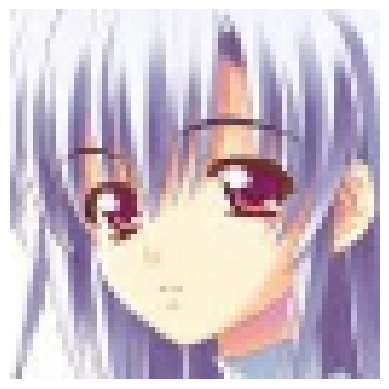

In [ ]:
image_batch = next(iter(train_images))
random_index = np.random.choice(image_batch.shape[0])
random_image = image_batch[random_index].numpy().astype("int32")

# Visualize 1 random image from the training dataset
plt.axis("off")
plt.imshow(random_image)
plt.show()

In [ ]:
def show(images):
    plt.figure(figsize=(4, 4))

    for i in range(16):
        plt.subplot(4, 4, i+1)
        img = keras.utils.array_to_img(images[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

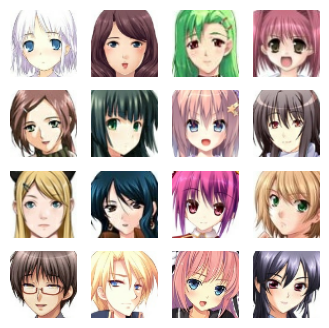

In [ ]:
# Visualize 16 images from the training dataset
show(image_batch[:16])

In [ ]:
# Normalize the images to [-1, 1] which is the range of the tanh activation
train_images = train_images.map(lambda x: (x - 127.5) / 127.5)

In [ ]:
# latent dimension of the random noise
LATENT_DIM = 128

WEIGHT_INIT = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# number of channels, 1 for gray scale and 3 for color images
CHANNELS = 3

In [ ]:
def build_generator():
    # create a Keras Sequential model
    model = Sequential(name="generator")

    # prepare for reshape: FC => BN => RN layers, note: input shape defined in the 1st Dense layer
    model.add(layers.Dense(8 * 8 * 512, input_dim=LATENT_DIM))
    # model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    # layers.LeakyReLU(alpha=0.2),

    # 1D => 3D: reshape the output of the previous layer
    model.add(layers.Reshape((8, 8, 512)))

    # upsample to 16x16: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(256, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # upsample to 32x32: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(128, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # upsample to 64x64: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(64, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # final layer: Conv2D with tanh activation
    model.add(layers.Conv2D(CHANNELS, (4, 4), padding="same", activation="tanh"))

    # return the generator model
    return model

In [ ]:
# build the generator model
generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             4227072   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 256)       2097152   
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 16, 16, 256)       1024      
 Normalization)                                                  
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 256)       0 

In [ ]:
def build_critic(height, width, depth, alpha=0.2):
    # Weight clipping to [-1, 1] to enfoce 1-Lipschitz constraint
    # constraint = WeightClip(0.01) # UPDATE for WGAN-GP: remove weight clipping

    # create a Keras Sequential model
    model = Sequential(name="critic")
    input_shape = (height, width, depth)

    # 1. first set of CONV => BN => leaky ReLU layers
    model.add(layers.Conv2D(64, (4, 4),
                            padding="same",
                            strides=(2, 2),
                            # kernel_constraint = constraint, # UPDATE for WGAN-GP: remove weight clipping
                            input_shape=input_shape))
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 2. second set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4),
                            padding="same",
                            strides=(2, 2)))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 3. third set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4),
                            padding="same",
                            strides=(2, 2)))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # flatten and apply dropout
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))

    # linear activation in the last layer
    # Note: Keras `Dense` layer by default is already a `linear` activation
    model.add(layers.Dense(1, activation="linear"))

    # return the critic model
    return model

In [ ]:
# build the critic model
critic = build_critic(64, 64, 3)

In [ ]:
critic.summary()

Model: "critic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0    

In [ ]:
class WGAN_GP(keras.Model):
    def __init__(self,
                 critic,
                 generator,
                 latent_dim,
                 critic_extra_steps,
                 gp_weight=10.0): # UPDATE for WGAN-GP: gradient penalty weight
        super().__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.c_extra_steps = critic_extra_steps
        self.gp_weight = gp_weight # WGAN-GP
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")


    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN_GP, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    # UPDATE for WGAN-GP: use gradient penalty instead of weight clipping
    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        Gradient penalty is calculated on an interpolated image
        and added to the discriminator loss.
        """

        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        # 1. Create the interpolated image
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 2. Get the Critic's output for the interpolated image
            pred = self.critic(interpolated, training=True)

        # 3. Calculate the gradients w.r.t to the interpolated image
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 4. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        # 5. Calculate gradient penalty
        gradient_penalty = tf.reduce_mean((norm - 1.0) ** 2)
        return gradient_penalty

    def train_step(self, real_images):

        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Train the critic more often than the generator by 5 times (self.c_extra_steps)
        for i in range(self.c_extra_steps):
            # Step 1. Train the critic with both real images and fake images
            with tf.GradientTape() as tape:
                pred_real = self.critic(real_images, training=True)
                fake_images = self.generator(noise, training=True)
                pred_fake = self.critic(fake_images, training=True)
                # UPDATE for WGAN-GP: Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # UPDATE for WGAN-GP: Add gradient penalty to the original critic loss
                d_loss = self.d_loss_fn(pred_real, pred_fake) + gp * self.gp_weight
            # Compute critic gradients
            grads = tape.gradient(d_loss, self.critic.trainable_variables)
            # Update critic weights
            self.d_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

        # Step 2. Train the generator (do not update weights of the critic)
        misleading_labels = tf.ones((batch_size, 1)) # G wants D to think the fake images are real (label as 1)

        with tf.GradientTape() as tape:
            fake_images = self.generator(noise, training=True)
            pred_fake = self.critic(fake_images, training=True)
            g_loss = self.g_loss_fn(pred_fake)
        # Compute generator gradients
        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update generator wieghts
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=100):
        self.num_img = num_img
        self.latent_dim = latent_dim

        # Create random noise seed for visualization during traing
        self.seed = tf.random.normal([16, latent_dim])

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.model.generator(self.seed)
        generated_images = (generated_images * 127.5) + 127.5
        generated_images.numpy()

        if epoch % n == 0:
          fig = plt.figure(figsize=(4, 4))
          for i in range(self.num_img):
              plt.subplot(4, 4, i+1)
              img = keras.utils.array_to_img(generated_images[i])
              plt.imshow(img)
              plt.axis('off')
          plt.savefig('epoch_{:03d}.png'.format(epoch))
          plt.show()

        # calculate FID for each n epochs
        epoch_num = epoch
        if epoch % n == 0:
          folder_name = "animeGenerated_wgan_" + str(epoch_num) + "epochs"
          print(folder_name)

          noise_size = 128
          seed = tf.random.normal([3001, noise_size])
          generated_images = self.model.generator(seed)
          generated_images = (generated_images * 127.5) + 127.5
          generated_images.numpy()

          # fig = plt.figure(figsize=(4, 4))
          for i in range(1,3001):
              img = keras.utils.array_to_img(generated_images[i])
              img.save(folder_name + "/anime_%d.jpg" % (i))

          self.model.generator.save('generator/generator'+ str(epoch_num) +'.h5')

          # Construct the command to run
          cmd = f"python -m pytorch_fid /content/anime_test /content/{folder_name}"

          # Print the captured output
          try:
            output = subprocess.check_output(cmd, shell=True, text=True)
            print(f"Output of the calculating FID command:\n{output}")
            fid_val = float(lastWord(output))
            FID_scores.append(fid_val)
            print("FID_scores: ",FID_scores)
            # Display the current plot
            if len(FID_scores) > 10:  # only display when the FID_scores size > 10
              # Create sample data
              epochs = np.arange(0, len(FID_scores)*n, n)  # Values from 0 with a step of 10
              fid_scores = np.array(FID_scores)
              print(fid_scores)
              # Find the minimum FID score and its corresponding epoch
              min_fid_score = min(fid_scores)
              min_fid_epoch = epochs[fid_scores.argmin()]
              # Create the plot
              plt.figure(figsize=(8, 6))
              plt.plot(epochs, fid_scores, marker='o', linestyle='-')
              plt.title('FID Score Over Epochs')
              plt.xlabel('Epoch num')
              plt.ylabel('FID score')
              plt.grid(True)
              # Annotate the minimum point with a rotated text and a straight arrow
              arrow_props = dict(arrowstyle='->', connectionstyle='arc3,rad=1')
              plt.annotate(f'Min FID Score: {min_fid_score:.2f}', xy=(min_fid_epoch, min_fid_score), xytext=(min_fid_epoch + 20, min_fid_score + 10.1),
                          arrowprops=arrow_props, rotation=0, va='bottom')
              # Highlight the minimum point with a red dot
              plt.scatter(min_fid_epoch, min_fid_score, color='red', s=100, label='Min FID Score')
              # Display the plot
              plt.show()

          except subprocess.CalledProcessError as e:
            # Handle any errors that may occur during command execution
            print(f"Error running command: {e}")


    def on_train_end(self, logs=None):
        self.model.generator.save('generator.h5')

In [ ]:
wgan_gp = WGAN_GP(critic=critic,
              generator=generator,
              latent_dim=LATENT_DIM,
              critic_extra_steps=5)

In [ ]:
# Wasserstein loss for the critic
def d_wasserstein_loss(pred_real, pred_fake):
    real_loss = tf.reduce_mean(pred_real)
    fake_loss = tf.reduce_mean(pred_fake)
    return fake_loss - real_loss

# Wasserstein loss for the generator
def g_wasserstein_loss(pred_fake):
    return -tf.reduce_mean(pred_fake)

In [ ]:
LR = 0.0001
d_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp
g_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp

In [ ]:
wgan_gp.compile(
    d_optimizer=d_optimizer,
    g_optimizer=g_optimizer,
    d_loss_fn = d_wasserstein_loss,
    g_loss_fn = g_wasserstein_loss
)

Epoch 1/802
237/237 [==============================] - ETA: 0s - d_loss: -20.8460 - g_loss: 14.0309

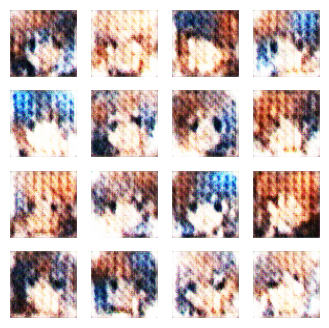

animeGenerated_wgan_0epochs


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Output of the calculating FID command:
FID:  369.80681853202964

FID_scores:  [369.80681853202964]
237/237 [==============================] - 91s 319ms/step - d_loss: -20.8460 - g_loss: 14.0309
Epoch 2/802
237/237 [==============================] - 33s 138ms/step - d_loss: -12.4964 - g_loss: -8.1046
Epoch 3/802
237/237 [==============================] - 33s 137ms/step - d_loss: -9.1345 - g_loss: -35.4531
Epoch 4/802
237/237 [==============================] - 33s 137ms/step - d_loss: -7.6127 - g_loss: -62.5334
Epoch 5/802
237/237 [==============================] - 33s 138ms/step - d_loss: -6.4178 - g_loss: -60.6227
Epoch 6/802
237/237 [==============================] - 33s 138ms/step - d_loss: -5.8754 - g_loss: -51.4535
Epoch 7/802
237/237 [==============================] - 33s 138ms/step - d_loss: -5.7562 - g_loss: -59.5518
Epoch 8/802
237/237 [==============================] - 33s 138ms/step - d_loss: -5.7937 - g_loss: -45.8736
Epoch 9/802
237/237 [==============================] - 33

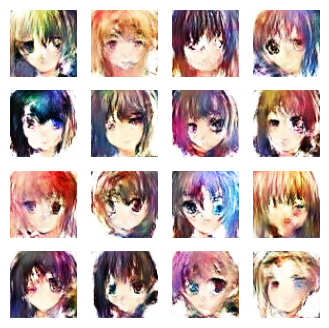

animeGenerated_wgan_10epochs


Output of the calculating FID command:
FID:  127.80293052478248

FID_scores:  [369.80681853202964, 127.80293052478248]
237/237 [==============================] - 49s 208ms/step - d_loss: -4.7620 - g_loss: -37.3239
Epoch 12/802
237/237 [==============================] - 33s 138ms/step - d_loss: -4.6060 - g_loss: -35.4336
Epoch 13/802
237/237 [==============================] - 33s 138ms/step - d_loss: -4.7869 - g_loss: -26.7192
Epoch 14/802
237/237 [==============================] - 33s 138ms/step - d_loss: -4.8665 - g_loss: -19.4798
Epoch 15/802
237/237 [==============================] - 33s 138ms/step - d_loss: -4.6210 - g_loss: -16.7664
Epoch 16/802
237/237 [==============================] - 33s 138ms/step - d_loss: -4.1297 - g_loss: -18.1347
Epoch 17/802
237/237 [==============================] - 33s 137ms/step - d_loss: -3.8311 - g_loss: -20.4995
Epoch 18/802
237/237 [==============================] - 33s 138ms/step - d_loss: -3.6849 - g_loss: -20.1181
Epoch 19/802
237/237 [========

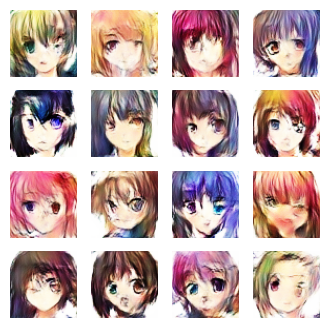

animeGenerated_wgan_20epochs


Output of the calculating FID command:
FID:  74.60943212765423

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423]
237/237 [==============================] - 50s 212ms/step - d_loss: -3.4558 - g_loss: -21.2506
Epoch 22/802
237/237 [==============================] - 33s 138ms/step - d_loss: -3.4078 - g_loss: -20.7331
Epoch 23/802
237/237 [==============================] - 33s 138ms/step - d_loss: -3.3082 - g_loss: -20.1007
Epoch 24/802
237/237 [==============================] - 33s 138ms/step - d_loss: -3.2351 - g_loss: -19.4616
Epoch 25/802
237/237 [==============================] - 33s 138ms/step - d_loss: -3.1638 - g_loss: -18.3093
Epoch 26/802
237/237 [==============================] - 33s 138ms/step - d_loss: -3.1170 - g_loss: -17.7046
Epoch 27/802
237/237 [==============================] - 33s 138ms/step - d_loss: -3.0498 - g_loss: -18.0273
Epoch 28/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.9828 - g_loss: -16.5258
Epoch 29/802

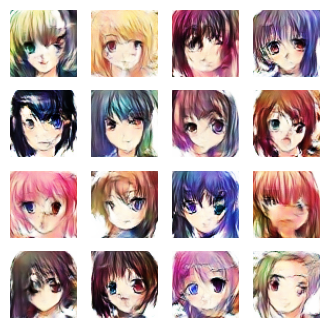

animeGenerated_wgan_30epochs


Output of the calculating FID command:
FID:  55.56736074227939

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939]
237/237 [==============================] - 49s 208ms/step - d_loss: -2.7955 - g_loss: -14.4047
Epoch 32/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.8079 - g_loss: -18.2212
Epoch 33/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.7414 - g_loss: -18.3325
Epoch 34/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.7614 - g_loss: -16.2656
Epoch 35/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.7283 - g_loss: -20.2731
Epoch 36/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.7141 - g_loss: -22.9411
Epoch 37/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.6680 - g_loss: -22.7466
Epoch 38/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.6316 - g_loss: -2

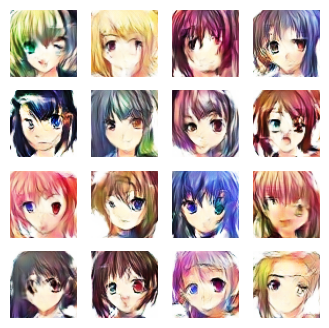

animeGenerated_wgan_40epochs


Output of the calculating FID command:
FID:  48.0681974097086

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086]
237/237 [==============================] - 49s 206ms/step - d_loss: -2.4706 - g_loss: -28.8035
Epoch 42/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.4645 - g_loss: -27.7596
Epoch 43/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.5579 - g_loss: -26.2463
Epoch 44/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.4514 - g_loss: -23.6539
Epoch 45/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.4151 - g_loss: -19.4315
Epoch 46/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.3589 - g_loss: -21.7907
Epoch 47/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.3869 - g_loss: -17.1291
Epoch 48/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.

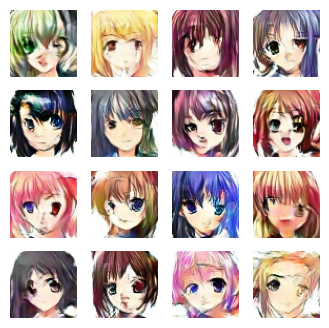

animeGenerated_wgan_50epochs


Output of the calculating FID command:
FID:  45.79643213630027

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027]
237/237 [==============================] - 49s 208ms/step - d_loss: -2.2476 - g_loss: -19.3138
Epoch 52/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.2417 - g_loss: -18.7584
Epoch 53/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.2326 - g_loss: -19.6681
Epoch 54/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.1183 - g_loss: -17.4038
Epoch 55/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.2078 - g_loss: -15.5838
Epoch 56/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.1347 - g_loss: -14.9007
Epoch 57/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.1731 - g_loss: -16.1634
Epoch 58/802
237/237 [==============================] - 33s 138m

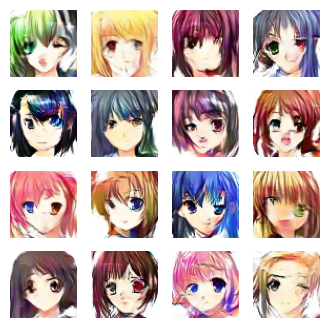

animeGenerated_wgan_60epochs


Output of the calculating FID command:
FID:  41.72429544633525

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525]
237/237 [==============================] - 50s 209ms/step - d_loss: -2.0612 - g_loss: -22.0427
Epoch 62/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.0334 - g_loss: -18.2169
Epoch 63/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.0770 - g_loss: -20.5739
Epoch 64/802
237/237 [==============================] - 33s 137ms/step - d_loss: -2.0544 - g_loss: -20.5795
Epoch 65/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.0019 - g_loss: -18.0252
Epoch 66/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.0034 - g_loss: -18.8782
Epoch 67/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9379 - g_loss: -19.5276
Epoch 68/802
237/237 [=======================

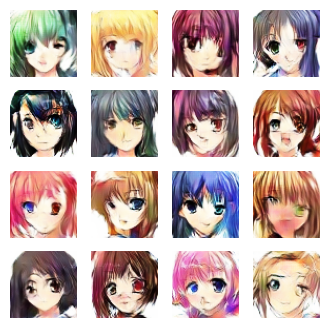

animeGenerated_wgan_70epochs


Output of the calculating FID command:
FID:  40.22876725272741

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741]
237/237 [==============================] - 50s 211ms/step - d_loss: -1.9195 - g_loss: -21.4820
Epoch 72/802
237/237 [==============================] - 33s 138ms/step - d_loss: -2.0225 - g_loss: -17.9698
Epoch 73/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9569 - g_loss: -17.7064
Epoch 74/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9584 - g_loss: -18.2063
Epoch 75/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9494 - g_loss: -15.8820
Epoch 76/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9490 - g_loss: -12.6218
Epoch 77/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9041 - g_loss: -18.1034
Epoch 78/802
237/237 [====

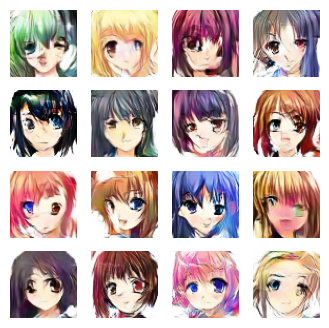

animeGenerated_wgan_80epochs


Output of the calculating FID command:
FID:  39.7320359611052

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052]
237/237 [==============================] - 49s 207ms/step - d_loss: -1.7981 - g_loss: -18.2007
Epoch 82/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8838 - g_loss: -17.2638
Epoch 83/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8344 - g_loss: -12.2885
Epoch 84/802
237/237 [==============================] - 33s 137ms/step - d_loss: -1.8841 - g_loss: -15.1365
Epoch 85/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7875 - g_loss: -18.4517
Epoch 86/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9177 - g_loss: -20.8166
Epoch 87/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8813 - g_loss: -16.7469
Epoch 88/

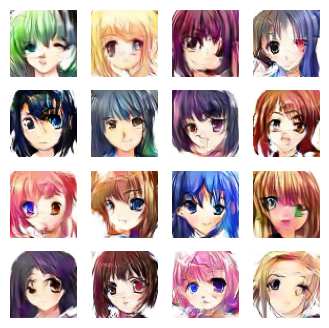

animeGenerated_wgan_90epochs


Output of the calculating FID command:
FID:  36.07624989766191

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191]
237/237 [==============================] - 49s 206ms/step - d_loss: -1.7414 - g_loss: -15.1663
Epoch 92/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8267 - g_loss: -16.5942
Epoch 93/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8569 - g_loss: -9.7095
Epoch 94/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7459 - g_loss: -12.3697
Epoch 95/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8191 - g_loss: -13.4254
Epoch 96/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7778 - g_loss: -11.4618
Epoch 97/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7870 - g_loss:

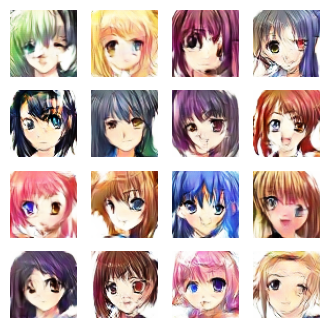

animeGenerated_wgan_100epochs


Output of the calculating FID command:
FID:  35.16375784870772

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785]


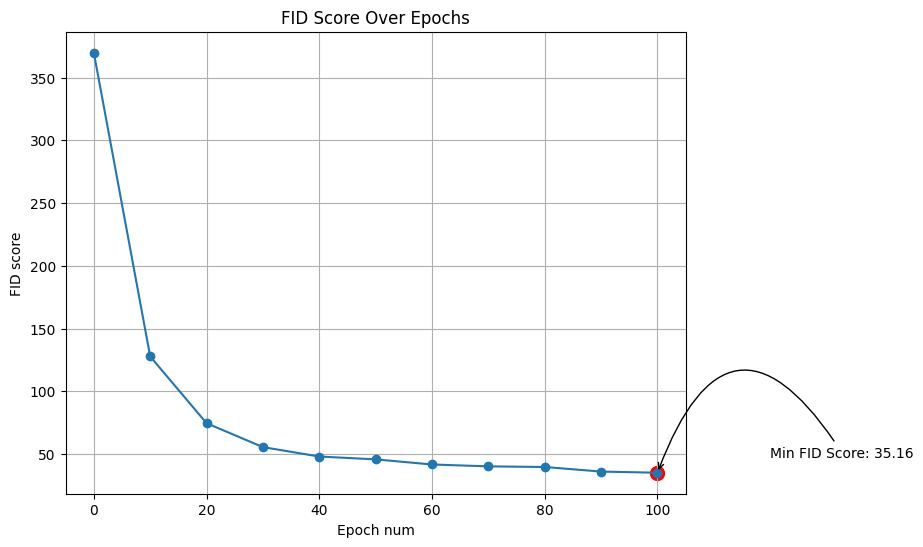

237/237 [==============================] - 50s 210ms/step - d_loss: -1.7892 - g_loss: -8.0601
Epoch 102/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8552 - g_loss: -5.5976
Epoch 103/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7744 - g_loss: -1.7211
Epoch 104/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.8010 - g_loss: -1.5414
Epoch 105/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7643 - g_loss: -5.5519
Epoch 106/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6752 - g_loss: -0.9036
Epoch 107/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6882 - g_loss: -0.3138
Epoch 108/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7220 - g_loss: 4.4705
Epoch 109/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6639 - g_loss: 7.3267
Epoch 110/802
237/237 [=====================

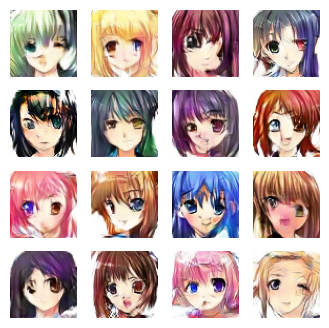

animeGenerated_wgan_110epochs


Output of the calculating FID command:
FID:  33.36316035822759

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036]


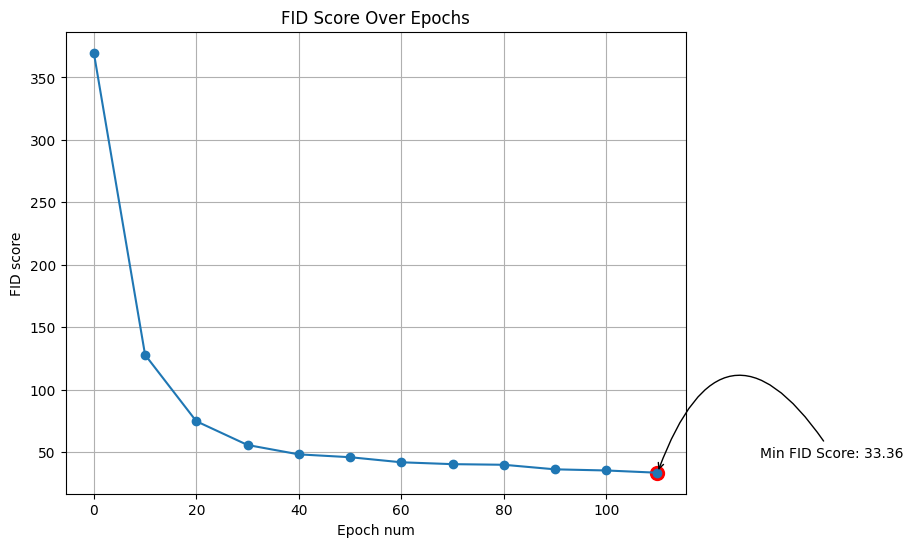

237/237 [==============================] - 51s 215ms/step - d_loss: -1.6531 - g_loss: 5.9874
Epoch 112/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5609 - g_loss: 11.7767
Epoch 113/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6184 - g_loss: 10.1516
Epoch 114/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5566 - g_loss: 14.4044
Epoch 115/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5478 - g_loss: 13.5532
Epoch 116/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6519 - g_loss: 13.2485
Epoch 117/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5928 - g_loss: 12.9051
Epoch 118/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6111 - g_loss: 5.8894
Epoch 119/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6314 - g_loss: 2.8890
Epoch 120/802
237/237 [======================

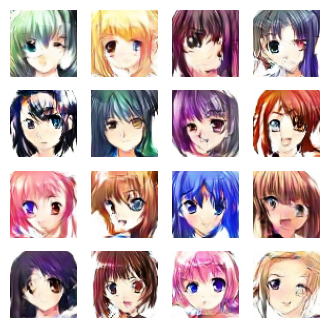

animeGenerated_wgan_120epochs


Output of the calculating FID command:
FID:  34.95323471589202

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472]


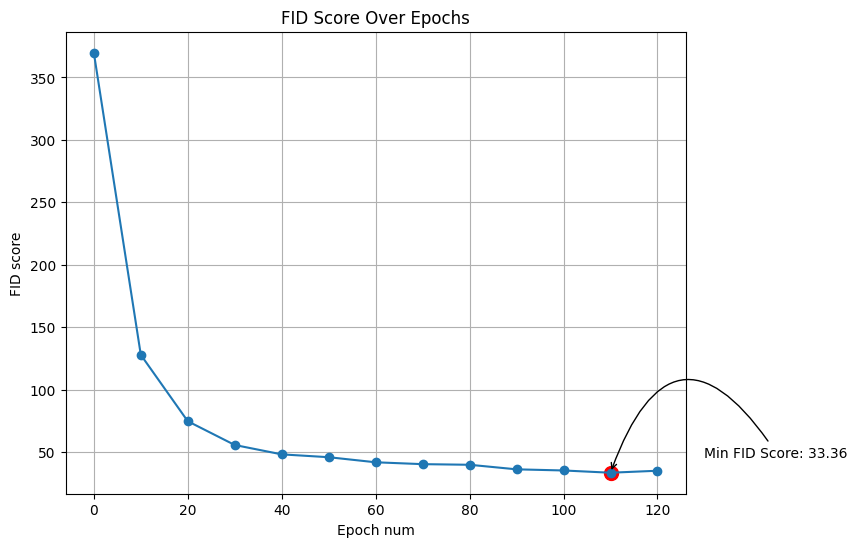

237/237 [==============================] - 50s 211ms/step - d_loss: -1.5660 - g_loss: 1.7422
Epoch 122/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6471 - g_loss: -1.9002
Epoch 123/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6084 - g_loss: -2.5999
Epoch 124/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5270 - g_loss: 1.8600
Epoch 125/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5970 - g_loss: -2.2248
Epoch 126/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5997 - g_loss: -1.8340
Epoch 127/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6446 - g_loss: -2.9587
Epoch 128/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6600 - g_loss: -0.1274
Epoch 129/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6168 - g_loss: -3.4220
Epoch 130/802
237/237 [=====================

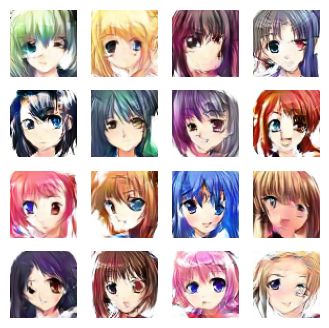

animeGenerated_wgan_130epochs


Output of the calculating FID command:
FID:  31.50316011088907

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011]


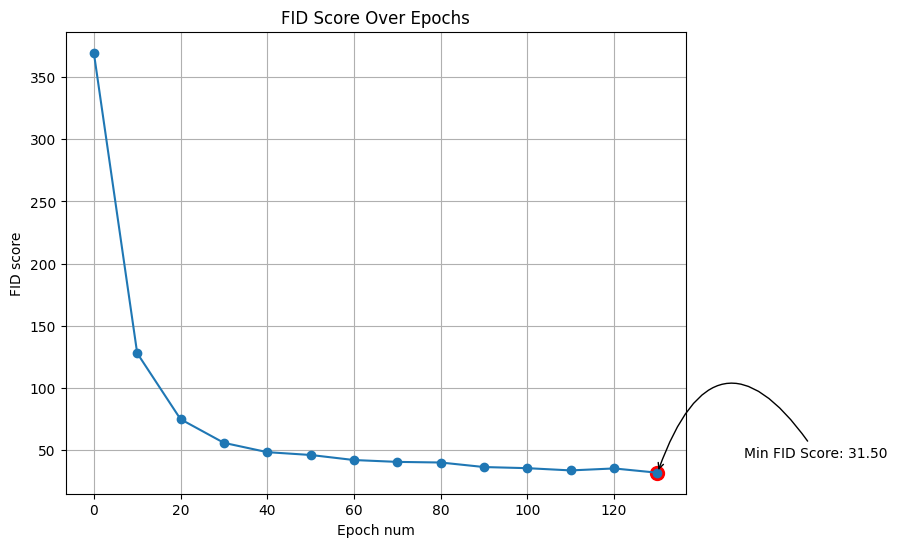

237/237 [==============================] - 49s 208ms/step - d_loss: -1.6235 - g_loss: -3.8346
Epoch 132/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6262 - g_loss: -4.3884
Epoch 133/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6468 - g_loss: -4.4481
Epoch 134/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.7249 - g_loss: -7.2383
Epoch 135/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6642 - g_loss: -6.9284
Epoch 136/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6647 - g_loss: -9.7012
Epoch 137/802
237/237 [==============================] - 33s 137ms/step - d_loss: -1.6149 - g_loss: -10.3859
Epoch 138/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5771 - g_loss: -4.0350
Epoch 139/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6443 - g_loss: -2.5592
Epoch 140/802
237/237 [==================

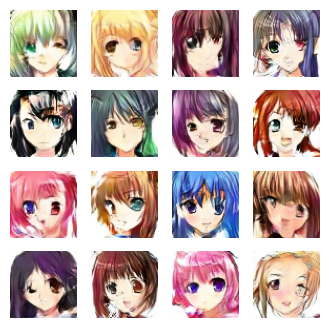

animeGenerated_wgan_140epochs


Output of the calculating FID command:
FID:  33.10391779576153

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907, 33.10391779576153]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011  33.1039178 ]


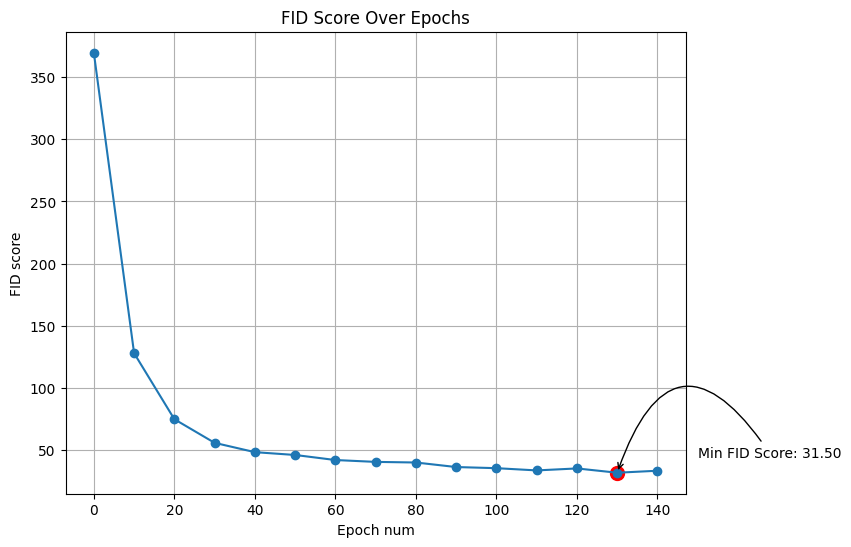

237/237 [==============================] - 49s 207ms/step - d_loss: -1.5829 - g_loss: -5.3515
Epoch 142/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5878 - g_loss: -4.4555
Epoch 143/802
237/237 [==============================] - 33s 137ms/step - d_loss: -1.5426 - g_loss: -4.1188
Epoch 144/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5997 - g_loss: -7.0293
Epoch 145/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5275 - g_loss: -4.2381
Epoch 146/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5247 - g_loss: -3.4404
Epoch 147/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5943 - g_loss: 0.3056
Epoch 148/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.5563 - g_loss: -2.4055
Epoch 149/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.4860 - g_loss: 1.7120
Epoch 150/802
237/237 [=====================

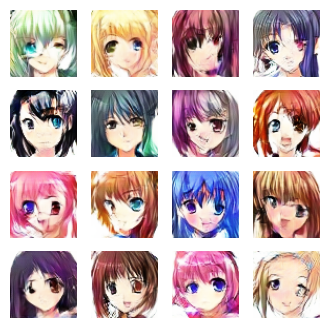

animeGenerated_wgan_150epochs


Output of the calculating FID command:
FID:  33.30155296731141

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907, 33.10391779576153, 33.30155296731141]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011  33.1039178
  33.30155297]


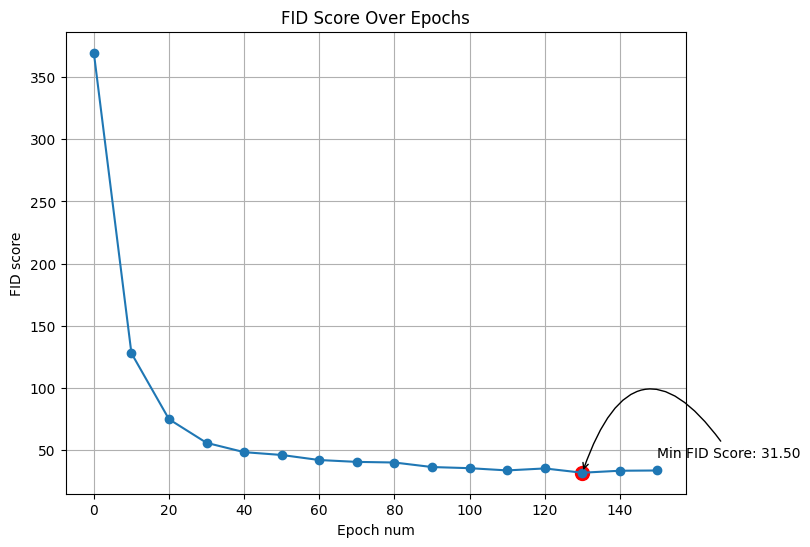

237/237 [==============================] - 50s 210ms/step - d_loss: -1.4854 - g_loss: 4.5642
Epoch 152/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.3810 - g_loss: 6.8152
Epoch 153/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.3331 - g_loss: 16.2530
Epoch 154/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.3310 - g_loss: 14.1751
Epoch 155/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.2654 - g_loss: 3.1290
Epoch 156/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.2666 - g_loss: -6.3616
Epoch 157/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.1699 - g_loss: -12.4569
Epoch 158/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.0938 - g_loss: -14.8725
Epoch 159/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.0076 - g_loss: -20.3553
Epoch 160/802
237/237 [===================

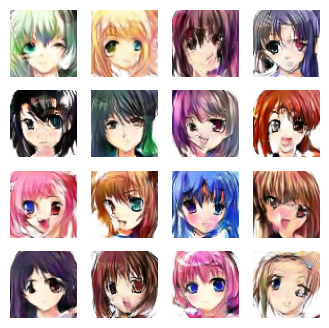

animeGenerated_wgan_160epochs


Output of the calculating FID command:
FID:  41.736865401752965

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907, 33.10391779576153, 33.30155296731141, 41.736865401752965]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011  33.1039178
  33.30155297  41.7368654 ]


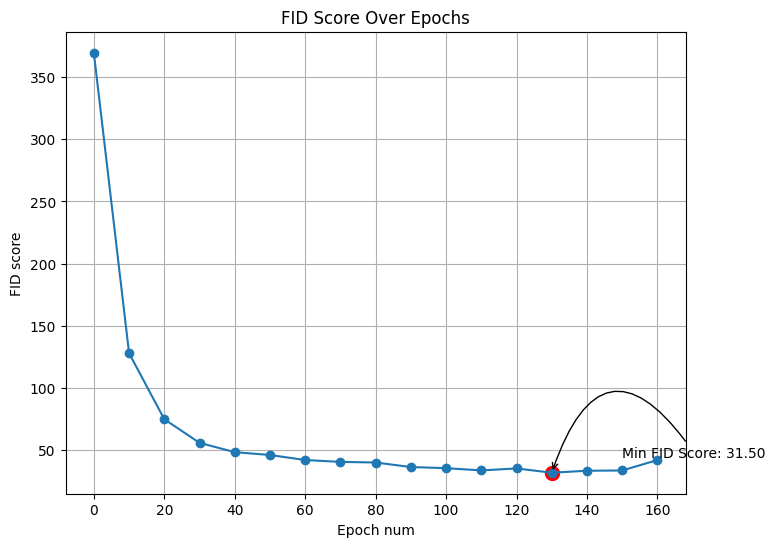

237/237 [==============================] - 50s 210ms/step - d_loss: -1.0810 - g_loss: -18.5678
Epoch 162/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.1294 - g_loss: -10.0535
Epoch 163/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.0595 - g_loss: -2.7373
Epoch 164/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.2358 - g_loss: -21.0849
Epoch 165/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9117 - g_loss: -11.1500
Epoch 166/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9342 - g_loss: -14.5414
Epoch 167/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.1206 - g_loss: -5.6554
Epoch 168/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9496 - g_loss: -18.9618
Epoch 169/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.8825 - g_loss: -8.7536
Epoch 170/802
237/237 [=============

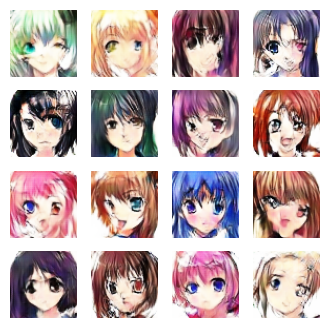

animeGenerated_wgan_170epochs


Output of the calculating FID command:
FID:  50.54963330254884

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907, 33.10391779576153, 33.30155296731141, 41.736865401752965, 50.54963330254884]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011  33.1039178
  33.30155297  41.7368654   50.5496333 ]


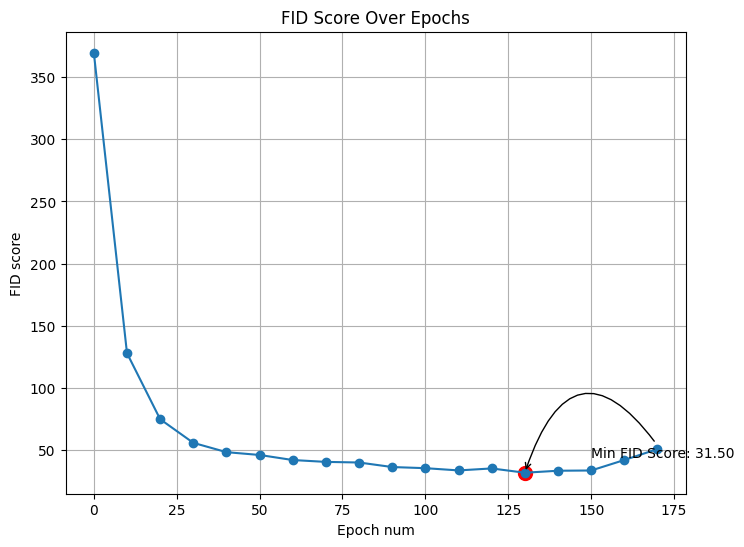

237/237 [==============================] - 50s 212ms/step - d_loss: -0.8668 - g_loss: -33.4762
Epoch 172/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9143 - g_loss: -48.6440
Epoch 173/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.6975 - g_loss: 2.8122
Epoch 174/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.8284 - g_loss: 3.1231
Epoch 175/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.7782 - g_loss: -23.0334
Epoch 176/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9552 - g_loss: -33.8602
Epoch 177/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9800 - g_loss: 46.3538
Epoch 178/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.1368 - g_loss: 86.4445
Epoch 179/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.8752 - g_loss: -97.9899
Epoch 180/802
237/237 [================

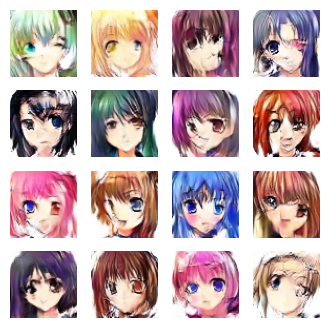

animeGenerated_wgan_180epochs


Output of the calculating FID command:
FID:  54.06652662929213

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907, 33.10391779576153, 33.30155296731141, 41.736865401752965, 50.54963330254884, 54.06652662929213]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011  33.1039178
  33.30155297  41.7368654   50.5496333   54.06652663]


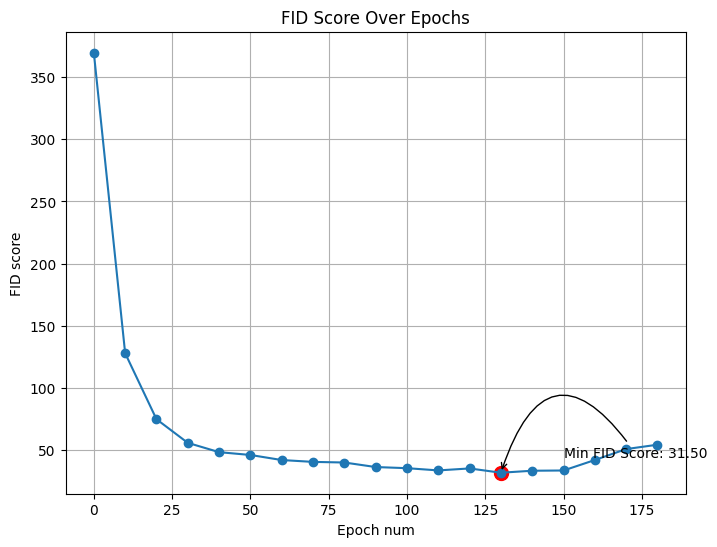

237/237 [==============================] - 50s 211ms/step - d_loss: -1.2307 - g_loss: -75.6564
Epoch 182/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.2253 - g_loss: -86.6011
Epoch 183/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9408 - g_loss: 18.4618
Epoch 184/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.5626 - g_loss: 16.7103
Epoch 185/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.9414 - g_loss: -90.2620
Epoch 186/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.4245 - g_loss: 37.5780
Epoch 187/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.4111 - g_loss: 30.7274
Epoch 188/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.7406 - g_loss: -3.0168
Epoch 189/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.6716 - g_loss: -106.8745
Epoch 190/802
237/237 [==============

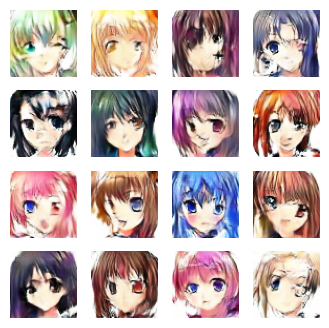

animeGenerated_wgan_190epochs


Output of the calculating FID command:
FID:  59.90930602543378

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907, 33.10391779576153, 33.30155296731141, 41.736865401752965, 50.54963330254884, 54.06652662929213, 59.90930602543378]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011  33.1039178
  33.30155297  41.7368654   50.5496333   54.06652663  59.90930603]


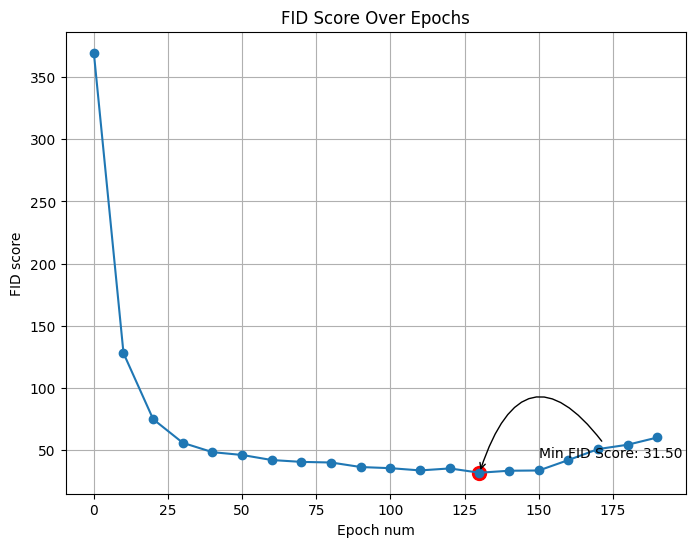

237/237 [==============================] - 50s 211ms/step - d_loss: -1.1298 - g_loss: -97.9272
Epoch 192/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.5566 - g_loss: 32.1732
Epoch 193/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.8009 - g_loss: 51.3334
Epoch 194/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.3365 - g_loss: 77.5387
Epoch 195/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.0377 - g_loss: 175.8925
Epoch 196/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.0538 - g_loss: 200.5545
Epoch 197/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.7666 - g_loss: 94.9697
Epoch 198/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.6421 - g_loss: 186.3982
Epoch 199/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.8737 - g_loss: 258.4955
Epoch 200/802
237/237 [==============

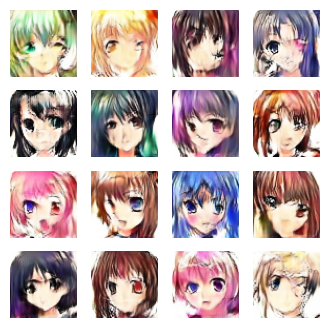

animeGenerated_wgan_200epochs


Output of the calculating FID command:
FID:  66.17560002108343

FID_scores:  [369.80681853202964, 127.80293052478248, 74.60943212765423, 55.56736074227939, 48.0681974097086, 45.79643213630027, 41.72429544633525, 40.22876725272741, 39.7320359611052, 36.07624989766191, 35.16375784870772, 33.36316035822759, 34.95323471589202, 31.50316011088907, 33.10391779576153, 33.30155296731141, 41.736865401752965, 50.54963330254884, 54.06652662929213, 59.90930602543378, 66.17560002108343]
[369.80681853 127.80293052  74.60943213  55.56736074  48.06819741
  45.79643214  41.72429545  40.22876725  39.73203596  36.0762499
  35.16375785  33.36316036  34.95323472  31.50316011  33.1039178
  33.30155297  41.7368654   50.5496333   54.06652663  59.90930603
  66.17560002]


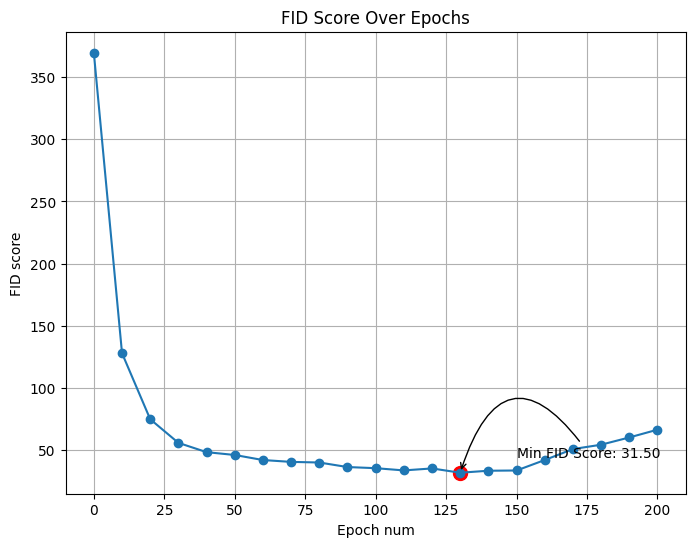

237/237 [==============================] - 49s 207ms/step - d_loss: -1.4471 - g_loss: 206.6123
Epoch 202/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.5262 - g_loss: 222.0043
Epoch 203/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.8639 - g_loss: 227.3140
Epoch 204/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.3592 - g_loss: 162.6858
Epoch 205/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.9648 - g_loss: 159.4319
Epoch 206/802
237/237 [==============================] - 33s 138ms/step - d_loss: -0.8768 - g_loss: 190.5115
Epoch 207/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.4294 - g_loss: 346.1232
Epoch 208/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.2934 - g_loss: 287.7692
Epoch 209/802
237/237 [==============================] - 33s 138ms/step - d_loss: -1.2484 - g_loss: 344.2011
Epoch 210/802
 91/237 [==========

In [ ]:
NUM_EPOCHS = 802 # number of epochs
wgan_gp.fit(train_images, epochs=NUM_EPOCHS, callbacks=[GANMonitor(num_img=16, latent_dim=LATENT_DIM)])